##                                            DIABETES PREDICTION

At first we want to navigate to the coresponding working directory

In [1]:
# import the os package to navigate into your systems directory

import os

In [2]:
os.getcwd()   # To get/know the working directory

'C:\\Users\\ragur\\Desktop\\Diabetics-intern'

### Load the dataset using pandas 

In [3]:
# import the pandas package which is used to load the dataset and perform some process

import pandas as pd

In [4]:
#create dataframe using read_csv('path to data') method

Diabetes_DF = pd.read_csv('C:\\Users\\ragur\\Desktop\\Diabetics-intern\\diabetes.csv')
Diabetes_DF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


To know some information about the data

In [5]:
Diabetes_DF.describe() # describe() method is used to show details about the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
Diabetes_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
Dataset = Diabetes_DF.values
Dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

After knowing about the data identify and seperate features from target variable. 

In [8]:
# here Pregnancies, Glucose, BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age are the features/independant variables.
# Only Outcome is the target/dependant variable

# select all the features from the dataset
features = Dataset[:,0:8] 
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
# select the Outcome column and assign to the target variable
target = Dataset[:,8]
target

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

Split the data into trainset,testset using sklearn train_test_split

train set     - 8 features ,1 target, 70% of dataset

test set      - 8 features ,1 target, 30% of dataset


79.0


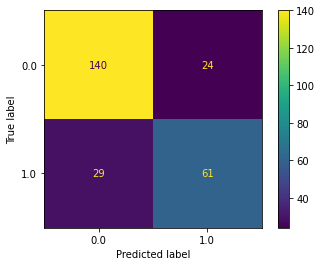

In [71]:
# import the train_test_split package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# split the features and target using train_test_split ---> X_train,X_val_and_test,Y_train,Y_val_and_test
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.33)


classifier = ABC()
classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_test)
predictions =[round(value) for value in y_pred]

accuracy = accuracy_score(Y_test,predictions)
print((round(accuracy*100)))

plot_confusion_matrix(classifier,X_test,Y_test)

In [72]:
import pickle

In [73]:
with open('classifier.pkl','wb') as f:
    pickle.dump(classifier,f)

In [74]:
with open('classifier.pkl','rb') as f:
    classifier_loaded = pickle.load(f)

In [76]:
Y_pred = classifier_loaded.predict(X_test)
predictions = [round(value) for value in Y_pred ]
accuracy = accuracy_score(Y_test,predictions)
print(round(accuracy*100))

79.0
